<a href="https://colab.research.google.com/github/svarogjk/shop_revenue_prediction/blob/master/%D0%A1ompetition_hse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Readings

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
current_palette = sns.color_palette()
# from tqdm import tqdm_notebook
%matplotlib inline 
import io
from google.colab import files

In [0]:
from itertools import product
from multiprocessing import Pool
from sklearn.preprocessing import LabelEncoder

In [3]:
!pip install fbprophet
from fbprophet import Prophet

    100% |████████████████████████████████| 2.1MB 11.3MB/s 
    100% |████████████████████████████████| 50.0MB 844kB/s 
  Running setup.py bdist_wheel for fbprophet ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-fpksccde/fbprophet/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-wtrfazuy --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-fpksccde/fbprophet/setup.py", line 123, in <module>
      """
    File "/usr/local/lib/python3.6/dist-packages/setuptools/__init__.py", line 140, in setup
      return distutils.core.setup(**attrs)
    File "/usr/lib/pytho

In [0]:
from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, make_scorer

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
file_list = drive.ListFile({'q': "'1W1X7lXaLjCLODvQqZUjolbT8MiOhZCnN' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

title: Сompetition_hse.ipynb, id: 15myye8KuYakG2l1Vf82oKzAydD5Ka1RX
title: Copy of Сompetition_hse.ipynb, id: 1K2ndtXjH-XNODUbAWQq-0l-JfE7qlg8A
title: all_data.csv, id: 1T4N3kUZa6agY5rvo_mzro9OAD0w0klJ2
title: test.csv.gz, id: 1WOkxqBGgUnZtJ5Zw83wADWG5cGkX0caX
title: sales_train.csv.gz, id: 1VfZXGEi9Jx3iHhzYVxutNEKH0PMgfh6l
title: shops.csv, id: 1jXGSJANRuhjhQ2AngVMQx9mRf911Cj3E
title: items.csv, id: 1YZrfzt-iDNGAJ7fAZZNMqGuS4OyJu1Nt
title: item_categories.csv, id: 1HJa-lyGoa7pfW-BXS8ckPQRMaYPvKbwq


In [8]:
transactions = drive.CreateFile({'id': '1VfZXGEi9Jx3iHhzYVxutNEKH0PMgfh6l'})
transactions.GetContentFile('sales_train.csv.gz')

items = drive.CreateFile({'id': '1YZrfzt-iDNGAJ7fAZZNMqGuS4OyJu1Nt'})
items.GetContentFile('items.csv')

item_categories = drive.CreateFile({'id': '1HJa-lyGoa7pfW-BXS8ckPQRMaYPvKbwq'})
item_categories.GetContentFile('item_categories.csv')

shops = drive.CreateFile({'id': '1jXGSJANRuhjhQ2AngVMQx9mRf911Cj3E'})
shops.GetContentFile('shops.csv')

transactions_test = drive.CreateFile({'id': '1WOkxqBGgUnZtJ5Zw83wADWG5cGkX0caX'})
transactions_test.GetContentFile('test.csv.gz')

INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1VfZXGEi9Jx3iHhzYVxutNEKH0PMgfh6l?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1YZrfzt-iDNGAJ7fAZZNMqGuS4OyJu1Nt?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1HJa-lyGoa7pfW-BXS8ckPQRMaYPvKbwq?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1jXGSJANRuhjhQ2AngVMQx9mRf911Cj3E?alt=json
INFO:googleapiclient.discovery:URL being requested: GET https://www.googleapis.com/drive/v2/files/1WOkxqBGgUnZtJ5Zw83wADWG5cGkX0caX?alt=json


In [0]:
transactions    = pd.read_csv('sales_train.csv.gz')
items           = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops           = pd.read_csv('shops.csv')
transactions_test = pd.read_csv('test.csv.gz')

In [10]:
transactions.columns
transactions_test.columns

Index(['ID', 'shop_id', 'item_id'], dtype='object')

In [11]:
transactions.head()
items.head()
shops.head()
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


### Treating outliers

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


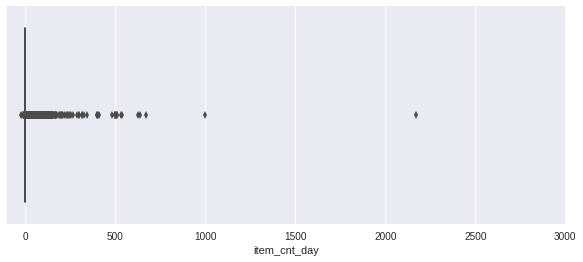

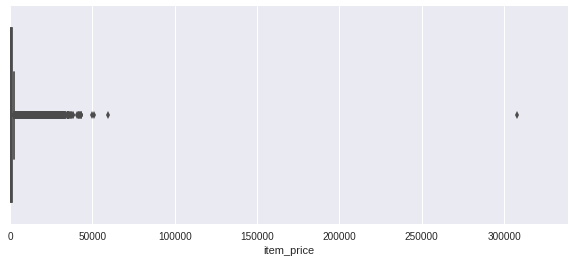

In [12]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=transactions.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(transactions.item_price.min(), transactions.item_price.max()*1.1)
sns.boxplot(x=transactions.item_price)

In [0]:
transactions = transactions[transactions.item_price<100000]
transactions = transactions[transactions.item_cnt_day<1001]

In [0]:
median = transactions[(transactions.shop_id==32)&(transactions.item_id==2973)&(transactions.date_block_num==4)&(transactions.item_price>0)].item_price.median()
transactions.loc[transactions.item_price<0, 'item_price'] = median

In [0]:
# Якутск Орджоникидзе, 56
transactions.loc[transactions.shop_id == 0, 'shop_id'] = 57
transactions_test.loc[transactions_test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
transactions.loc[transactions.shop_id == 1, 'shop_id'] = 58
transactions_test.loc[transactions_test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
transactions.loc[transactions.shop_id == 10, 'shop_id'] = 11
transactions_test.loc[transactions_test.shop_id == 10, 'shop_id'] = 11

### We add a new date column which should also be treated

In [0]:
'''treating datetime and adding revenue'''
transactions["new_date"] = pd.to_datetime(transactions.date, format='%d.%m.%Y')
# print(transactions.head())
transactions["year"] = pd.DatetimeIndex(transactions.new_date).year
transactions["month"] = pd.DatetimeIndex(transactions.new_date).month
transactions["day"] = pd.DatetimeIndex(transactions.new_date).day

### Here is "revenue" added

In [0]:
transactions["revenue"] = transactions.item_price * transactions.item_cnt_day

In [0]:
'''join columns from items to main df'''
transactions = transactions.set_index("item_id").join(items.set_index("item_id"))

In [0]:
days_a_month = pd.DataFrame({'month': np.arange(1, 13),
                             'days_a_month': [31, 28, 31, 30, 31, 30,
                                              31, 31, 30, 31, 30, 31]})

### join columns from days_a_month to main df

In [20]:
transactions.reset_index(inplace=True)
transactions = transactions.set_index("month").join(days_a_month.set_index("month"))
transactions.reset_index(inplace=True)
transactions = transactions.sort_values(by=['new_date', 'shop_id', 'item_id'])
transactions.reset_index(inplace=True, drop=True)
transactions.head(3)

,month,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,new_date,year,day,revenue,item_name,item_category_id,days_a_month
0,1,991,01.01.2013,0,2,99.0,1.0,2013-01-01,2013,1,99.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,31
1,1,1472,01.01.2013,0,2,2599.0,1.0,2013-01-01,2013,1,2599.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,31
2,1,1905,01.01.2013,0,2,249.0,1.0,2013-01-01,2013,1,249.0,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,31


## Shop / item pair values per month 

### data separating to join them to modified data structure, further we'll join these dfs to both: train and test DataFrames

In [21]:
time_df = transactions[['item_id', 'shop_id', 'date_block_num', 'year', 'month',
                        'day', 'days_a_month', "new_date"]].copy()
time_df.head(2)

,item_id,shop_id,date_block_num,year,month,day,days_a_month,new_date
0,991,2,0,2013,1,1,31,2013-01-01
1,1472,2,0,2013,1,1,31,2013-01-01


In [22]:
item_df = transactions[['item_id', 'item_category_id']].copy()
item_df.head(2)

,item_id,item_category_id
0,991,67
1,1472,23


#### item price df for all shops

In [23]:
item_price_df = transactions.groupby(['item_id', 'date_block_num'],as_index=False).item_price.mean()
item_price_df.head()

,item_id,date_block_num,item_price
0,0,20,58.0
1,1,15,4490.0
2,1,18,4490.0
3,1,19,4490.0
4,1,20,4490.0


In [24]:
transactions.head(2)

,month,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,new_date,year,day,revenue,item_name,item_category_id,days_a_month
0,1,991,01.01.2013,0,2,99.0,1.0,2013-01-01,2013,1,99.0,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,31
1,1,1472,01.01.2013,0,2,2599.0,1.0,2013-01-01,2013,1,2599.0,"Assassin's Creed 3 [Xbox 360, русская версия]",23,31


In [25]:
time_range = pd.date_range(start='2013-01-01',
                           end='2015-10-30')
time_range = pd.DataFrame({'new_date': time_range})
# time_range = time_range.set_index('new_date').resample('M').sum().to_period('M')
time_range = time_range.set_index('new_date')
time_range.head(2)

""
new_date
2013-01-01
2013-01-02


In [26]:
transactions_test.shape

(214200, 3)

In [30]:
transactions_transf = transactions[['item_id', 'shop_id', 'item_cnt_day', 'new_date']]
transactions_transf = transactions_test.join(transactions_transf.set_index(['item_id', 'shop_id']), on=['item_id', 'shop_id'])
trans_lst = [x for _, x in transactions_transf.groupby(['item_id', 'shop_id'], as_index=False)]
len(trans_lst)
trans_lst[0:3]

[          ID  shop_id  item_id  item_cnt_day   new_date
 22987  22987        2       30           1.0 2013-03-01
 22987  22987        2       30           1.0 2013-06-16
 22987  22987        2       30           1.0 2014-04-20
 22987  22987        2       30           1.0 2014-05-08,
           ID  shop_id  item_id  item_cnt_day   new_date
 17887  17887        3       30           1.0 2013-02-17
 17887  17887        3       30           1.0 2013-02-23
 17887  17887        3       30           1.0 2013-02-24
 17887  17887        3       30           1.0 2013-02-26
 17887  17887        3       30           2.0 2013-03-08
 17887  17887        3       30           1.0 2013-03-09
 17887  17887        3       30           1.0 2013-03-18
 17887  17887        3       30           1.0 2013-03-31
 17887  17887        3       30           1.0 2013-04-10
 17887  17887        3       30           1.0 2013-04-17
 17887  17887        3       30           1.0 2013-05-04
 17887  17887        3       3

In [35]:
len(trans_lst)

214200

In [0]:
time_range = pd.date_range(start='2013-01-01',
                           end='2015-10-30')
time_range = pd.DataFrame({'new_date': time_range})
time_range = time_range.set_index('new_date')

In [0]:
def compute_res_df(current_df,
                   time_range=pd.DataFrame({'new_date': pd.date_range(start='2013-01-01',
                           end='2015-10-30')}).set_index('new_date')):
    shop_id = current_df.shop_id.iloc[0]
    item_id = current_df.item_id.iloc[0]
    
    ph_df = current_df[['new_date', 'item_cnt_day']].copy()

    ph_df = time_range.join(ph_df.set_index("new_date")).fillna(0)

    ph_df = ph_df.reset_index().rename(columns={'new_date': 'ds',
                        'item_cnt_day': 'y'})

    m = Prophet(daily_seasonality=True)
    m.fit(ph_df)
    future = m.make_future_dataframe(periods=31)
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].rename(columns={'ds':'new_date',
                        'yhat':'target'})
    #     print(forecast.tail())  
    target_sum = np.max((np.round(forecast.target.sum()), 0))
    #     print(target_sum)
    res_df = pd.DataFrame({'shop_id': shop_id,
                           'item_id': item_id,
                           'target': target_sum},
                           index = [0])


    print("result df : ")
    print(res_df)
    
    return res_df

In [0]:
res_lst = []
i = 0
for df in trans_lst:
  i += 1
  print("Current_iter = ", i)
  res_df = compute_res_df(df)
  res_lst.append(res_df)
res_df = pd.concat(res_lst)

Current_iter =  1
result df : 
   item_id  shop_id  target
0       30        2     4.0
Current_iter =  2
result df : 
   item_id  shop_id  target
0       30        3    20.0
Current_iter =  3
result df : 
   item_id  shop_id  target
0       30        4    11.0
Current_iter =  4
result df : 
   item_id  shop_id  target
0       30        5    19.0
Current_iter =  5
result df : 
   item_id  shop_id  target
0       30        6    52.0
Current_iter =  6
result df : 
   item_id  shop_id  target
0       30        7    23.0
Current_iter =  7
result df : 
   item_id  shop_id  target
0       30       11     9.0
Current_iter =  8
result df : 
   item_id  shop_id  target
0       30       12    16.0
Current_iter =  9
result df : 
   item_id  shop_id  target
0       30       14    13.0
Current_iter =  10
result df : 
   item_id  shop_id  target
0       30       15    34.0
Current_iter =  11
result df : 
   item_id  shop_id  target
0       30       16    29.0
Current_iter =  12
result df : 
   item_i

In [0]:
res_df.head()

In [34]:
res_df.to_csv("res_df.csv")

# Create & upload a file.
uploaded = drive.CreateFile({'res_df': 'res_df.csv'})
uploaded.SetContentFile('res_df.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

NameError: ignored